In [8]:
#import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly
from tqdm import tnrange
plotly.tools.set_credentials_file(username='serereuk', api_key='KrI0ugSnjcltrwQkSmbO')
#%matplotlib inline
#%matplotlib widget

In [9]:
os.chdir('/Users/Wook-Young/Desktop/RA/code/RA_code/11주차/')
os.chdir(os.getcwd()+'/eyetracking_intention/s01/eyetrack')

In [10]:
data = pd.read_csv('s011.txt')

In [11]:
data.tail()

,ATT,ADT,ALX,ALY,ARI,APW,APH,AQU,AFX,BTT,BDT,BLX,BLY,BRI,BPW,BPH,BQU,BFX,CNT,MRK
77710,1296.2993,16.6711,0.6831,0.6584,-1,0.1597,0.0942,1,0.1501,1296.2953,16.7231,0.5964,0.7429,-1,0.1768,0.1115,1,0.0167,77710,""""
77711,1296.3160,16.6918,0.6967,0.6404,-1,0.1795,0.1299,1,0.1668,1296.3120,16.6784,0.5786,0.7467,-1,0.1647,0.1153,1,0.0167,77711,""""
77712,1296.3327,16.7119,0.6883,0.6307,-1,0.1854,0.1354,1,0.1835,1296.3287,16.7150,0.5932,0.7454,-1,0.1571,0.1135,1,0.0167,77712,""""
77713,1296.3493,16.6462,0.6924,0.6400,-1,0.1835,0.1343,1,0.2002,1296.3453,16.6440,0.5925,0.7518,-1,0.1611,0.1035,1,0.0166,77713,""""
77714,1296.3660,16.6569,0.6922,0.6408,-1,0.1822,0.1234,1,0.2168,1296.3621,16.7166,0.5960,0.7447,-1,0.1592,0.1029,1,0.0167,77714,""""


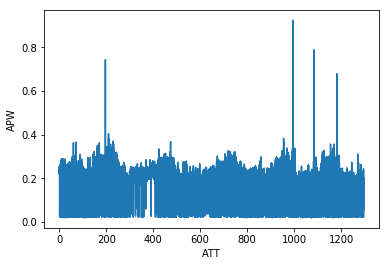

In [12]:
sns.lineplot(x='ATT', y='APW', data=data)

In [13]:
ti=[0,7.29, 187.51, 289.11, 455.07, 522.97, 702.98, 776.77, 953.13, 1030.84, 1151.41,1296.3661]

In [14]:
ti_apw = []; ti_aph = []; labeling = []; mi_apw = []; mi_aph = []; vi_apw = []; vi_aph = []
for i in tnrange(len(ti)-1):
    temp = data.loc[(data.ATT >= ti[i]) & (data.ATT < ti[i+1])]
    for t in range(len(temp)):
        ti_apw.append(np.mean(temp.APW))
        ti_aph.append(np.mean(temp.APH))
        mi_apw.append(np.median(temp.APW))
        mi_aph.append(np.median(temp.APH))
        vi_apw.append(np.cov(temp.APW))
        vi_aph.append(np.cov(temp.APH))
        if t == len(temp)-1:
            labeling.append(1)
        else:
            labeling.append(0)

In [15]:
data['label'] = pd.cut(data.ATT, ti, include_lowest=True, labels =False)

In [16]:
len(ti), len(ti_apw), len(ti_aph), len(data), len(labeling)

(12, 77715, 77715, 77715, 77715)


Video start	522.97
Video finish	702.98

Cross Onset	702.99

Engagement scale start	705.99
Engagement scale finish	709.58

Intention selection start	709.58
Intention selection finished_#1:	715.24
Intention selection finished_#2:	722.16
Intention selection finished_#3:	725.55
Intention selection finished_#4:	730.36
Intention selection finished_#5:	735.72
Intention selection finished_#6:	745.00
Intention selection finished_#7:	747.07
Intention selection finished_#8:	754.07

Emotion scale start	754.08
Emotion scale finished_#1:	757.98
Emotion scale finished_#2:	762.64
Emotion scale finished_#3:	765.74

Cross Onset	765.75


In [17]:
apw=go.Scatter(x = data.ATT.tolist(), y= data.APW.tolist(), line = dict(color = "#17BECF"), opacity = 0.8)
mean=go.Scatter(x = data.ATT.tolist(), y = ti_apw, line = dict(color = '#7F7F7F'), opacity = 0.8)
lb = go.Scatter(x = data.ATT.tolist(), y = labeling, line = dict(color = 'red'), opacity = 0.8)
median = go.Scatter(x = data.ATT.tolist(), y = mi_apw, line = dict(color = 'green'), opacity = 0.8)
apw = [apw, mean, lb, median]
layout = dict(xaxis=dict(rangeselector=dict(buttons=[dict(step='all')]) ,rangeslider=dict(visible = True)))
fig = dict(data=apw, layout=layout)
plotly.offline.init_notebook_mode(connected=True)
py.iplot(fig)

/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


The draw time for this plot will be slow for all clients.


/anaconda3/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [18]:
aph=go.Scatter(x = data.ATT.tolist(), y= data.APH.tolist(), line = dict(color = "#17BECF"), opacity = 0.8)
mean=go.Scatter(x = data.ATT.tolist(), y = ti_aph, line = dict(color = '#7F7F7F'), opacity = 0.8)
lb = go.Scatter(x = data.ATT.tolist(), y = labeling, line = dict(color = 'red'), opacity = 0.8)
median = go.Scatter(x = data.ATT.tolist(), y = mi_aph, line = dict(color = 'green'), opacity = 0.8)
apw = [aph, mean, lb, median]
layout = dict(xaxis=dict(rangeselector=dict(buttons=[dict(step='all')]) ,rangeslider=dict(visible = True)))
fig = dict(data=apw, layout=layout)
plotly.offline.init_notebook_mode(connected=True)
py.iplot(fig)

/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


The draw time for this plot will be slow for all clients.


/anaconda3/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [19]:
data.head()

,ATT,ADT,ALX,ALY,ARI,APW,APH,AQU,AFX,BTT,...,BLX,BLY,BRI,BPW,BPH,BQU,BFX,CNT,MRK,label
0,0.0000,0.0000,0.7132,0.3447,-1,0.2288,0.2153,1,0.6672,-0.0075,...,0.5996,0.4064,-1,0.2421,0.2322,1,0.5005,0,"=,=,+,+""",0
1,0.0167,16.6703,0.7074,0.3471,-1,0.2419,0.2083,1,0.6839,0.0092,...,0.5964,0.4025,-1,0.2547,0.2316,1,0.5171,1,"""",0
2,0.0334,16.7404,0.7134,0.3473,-1,0.2310,0.2149,1,0.7006,0.0258,...,0.6028,0.4074,-1,0.2384,0.2308,1,0.5337,2,"""",0
3,0.0500,16.5739,0.7108,0.3473,-1,0.2312,0.2120,1,0.7172,0.0425,...,0.5936,0.4074,-1,0.2559,0.2362,1,0.5504,3,"""",0
4,0.0668,16.8038,0.7140,0.3481,-1,0.2277,0.2172,1,0.7340,0.0592,...,0.5995,0.4061,-1,0.2431,0.2365,1,0.5672,4,"""",0


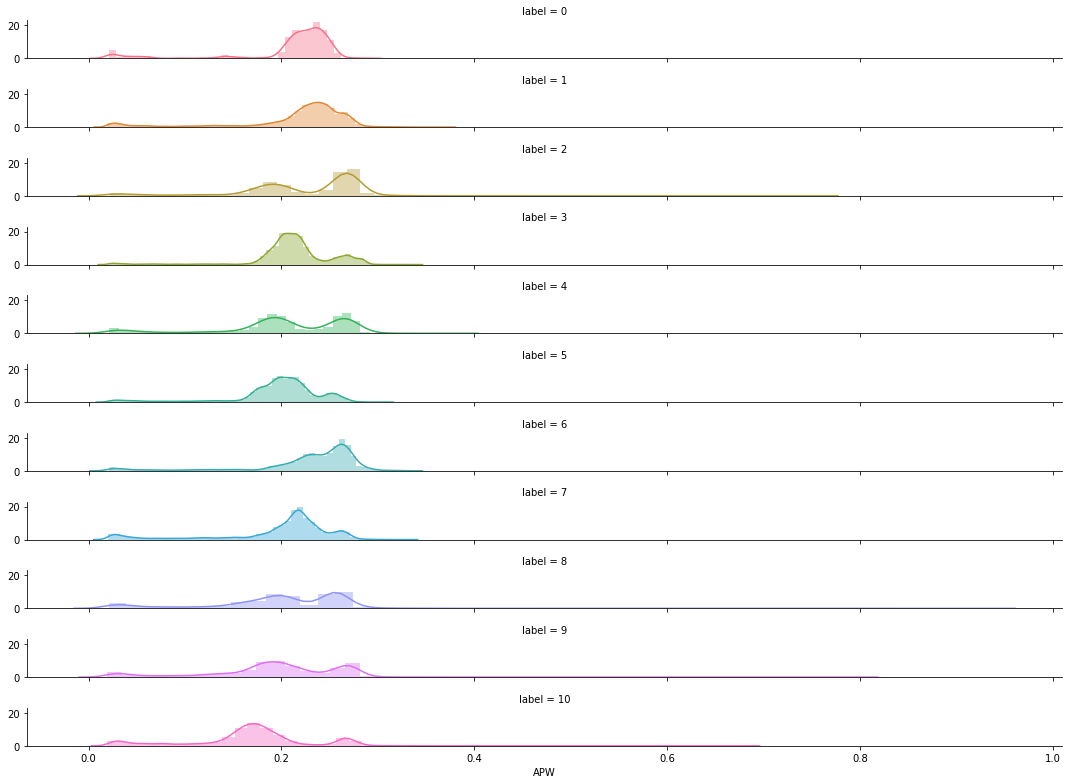

In [27]:
g = sns.FacetGrid(data, row = 'label', hue = 'label',aspect=15, height=1)
g.map(sns.distplot, "APW")
#g.set(xlim=(-0.1,0.6))
#g.map(sns.kdeplot, 'diffe', clip_on=False, color="w", lw=2, bw=.2)
#g.map(plt.axhline, y=0, lw=2, clip_on=False)
os.chdir('/Users/Wook-Young/Desktop/RA/code/RA_code/11주차')
g.savefig('dist_by label apw.jpg')


In [23]:
os.getcwd()

'/Users/Wook-Young/Desktop/RA/code/RA_code/11주차/eyetracking_intention/s01/eyetrack'